# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [25]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [26]:
# Your code here

# Define the alpha_func function
def alpha_func(D, idx):
    # Calculate the covariance matrix for Sepal width and Sepal length at the given index/indices
    cov = np.cov(D[['Sepal.Width', 'Sepal.Length']].loc[idx], rowvar=False)
    # Compute alpha using the elements of the covariance matrix
    return (cov[1, 1] - cov[0, 1]) / (cov[0, 0] + cov[1, 1] - 2 * cov[0, 1])

# Calculate alpha values for all rows in the dataframe using the alpha_func
alpha_original = alpha_func(df, range(len(df)))
print(alpha_original)


0.7580390244311441


Test the code below

In [27]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [28]:
# Create a random number generator with a seed value of 0
rng = np.random.default_rng(0)

# Generate a bootstrap sample by randomly selecting indices from 0 to 99 with replacement
alpha_bootstrap = alpha_func(df, rng.choice(100, 100, replace=True))

print(f"Bootstrap alpha values: {alpha_bootstrap}")

Bootstrap alpha values: 0.6675354865158225


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [33]:
# Add your code here to set the seed

# (iii) It is incorrect to use the Sepal.Length variable to calculate the average petal length, as Sepal.Length represents the length of the sepals, not the petals. 
# The relevant variable for petal length is Petal.Length.Simply calculating the mean of Petal.Length may not provide a complete picture, 
# as it does not account for the variability or uncertainty in the estimate. The mean alone does not give information about the distribution of petal lengths or the precision of the estimate. 
# Performing bootstrapping can provide the additional information, like estimate the sampling distribution, calculate confidence intervals, assess bias and skewness, robustness to assumptions.
# By performing bootstrapping, analysts gain valuable insights into the variability and uncertainty associated with the estimate of the average petal length, which is crucial for making 
# informed decisions about space allotment for the upcoming shipment.

# (iv) Answer: By setting a seed, we ensure that the random resampling process in bootstrapping is reproducible, which is essential for consistent results and debugging purposes.

# Initialize an empty list to store bootstrap values
bootstrap_values = []

def boot_SE(D, alpha_func, B=1000, seed=33):
    """
    Compute the bootstrap standard error of alpha estimates.

    Args:
        D (pandas.DataFrame): Input data.
        alpha_func (function): Function to compute the statistic of interest (e.g., mean).
        B (int, optional): Number of bootstrap samples. Default is 1000.
        seed (int, optional): Seed for random number generator. Default is 0.

    Returns:
        float: Bootstrap standard error.
    """
    rng = np.random.default_rng(seed)
    n = D.shape[0]

    # Loop through B bootstrap samples
    for i in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)

    return np.std(np.array(bootstrap_values))


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [51]:
# Example DataFrame
#df = pd.DataFrame({'values': np.random.randn(100)})  # Create a DataFrame with 100 random values

# Evaluate the bootstrap standard error of alpha with B = 1000 bootstrap samples
alpha_SE = boot_SE(df, alpha_func, B=1000, seed=0)

# Print the calculated bootstrap standard error
print(f"Bootstrap Standard Error of Alpha: {alpha_SE}")

Bootstrap Standard Error of Alpha: 0.03136171510721751


_(vi)_ What is the original mean value of `Sepal.Length`?


In [56]:
# Calculate the mean value of Sepal.Length

print(f"Original mean value of sepal length: {np.mean(df['Sepal.Length'])}")

Original mean value of sepal length: 5.843333333333334


Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [61]:
# Extract the Sepal.Length column values from the DataFrame and convert to a numpy array
sepal_length_data = df['Sepal.Length'].values

# Define the function to generate bootstrap samples and calculate statistics
def bootstrap_samples(data, n_bootstrap, seed=0):
    """
    Generate bootstrap samples and calculate their means and standard deviation.

    Parameters:
    - data: The dataset (array-like) to bootstrap.
    - n_bootstrap: The number of bootstrap samples to generate.
    - seed: Random seed for reproducibility (default is 0).

    Returns:
    - bootstrap_means: Array of means for each bootstrap sample.
    - boot_mean: Mean of the bootstrap sample means.
    - boot_std: Standard deviation of the bootstrap sample means.
    """
    rng = np.random.default_rng(seed)  # Create a random number generator with the given seed
    bootstrap_means = []  # List to store the means of bootstrap samples

    # Generate bootstrap samples and calculate their means
    for _ in range(n_bootstrap):
        bootstrap_sample = rng.choice(data, size=len(data), replace=True)  # Generate a bootstrap sample
        bootstrap_means.append(np.mean(bootstrap_sample))  # Calculate and store the mean of the bootstrap sample
    
    bootstrap_means = np.array(bootstrap_means)  # Convert the list to a numpy array
    boot_mean = np.mean(bootstrap_means)  # Calculate the mean of the bootstrap sample means
    boot_std = np.std(bootstrap_means, ddof=1)  # Calculate the standard deviation of the bootstrap sample means

    return bootstrap_means, boot_mean, boot_std  # Return the bootstrap means, their mean, and their standard deviation

# Generate bootstrap samples and calculate statistics for the Sepal.Length data
boot_se_samples, boot_mean, boot_std = bootstrap_samples(sepal_length_data, n_bootstrap=1000, seed=13)

# Calculate the mean of the original Sepal.Length data
mean_sepal_length = df['Sepal.Length'].mean()

# Print the original mean value of Sepal.Length
print(f"The original mean value of Sepal.Length is: {mean_sepal_length}")

# Print the bootstrapped mean value of Sepal.Length
print(f"The bootstrapped mean value of Sepal.Length is: {boot_mean}")

# Print the bootstrapped standard deviation of Sepal.Length
print(f"The bootstrapped standard deviation of Sepal.Length is: {boot_std}")

# Calculate the range (peak-to-peak) of the bootstrap sample means
t_range = np.ptp(boot_se_samples)

# Print the range of the bootstrapped samples
print(f"The range of the bootstrapped samples is: {t_range}")

The original mean value of Sepal.Length is: 5.843333333333334
The bootstrapped mean value of Sepal.Length is: 5.842043333333333
The bootstrapped standard deviation of Sepal.Length is: 0.0703228292336318
The range of the bootstrapped samples is: 0.4460000000000006


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [64]:
# Compute the 95% confidence intervals
conf_interval = np.percentile(boot_se_samples, [2.5, 97.5])

print("The 95-percent confidence interval for the mean of iris Sepal.Length: ", conf_interval)

The 95-percent confidence interval for the mean of iris Sepal.Length:  [5.70061667 5.98001667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

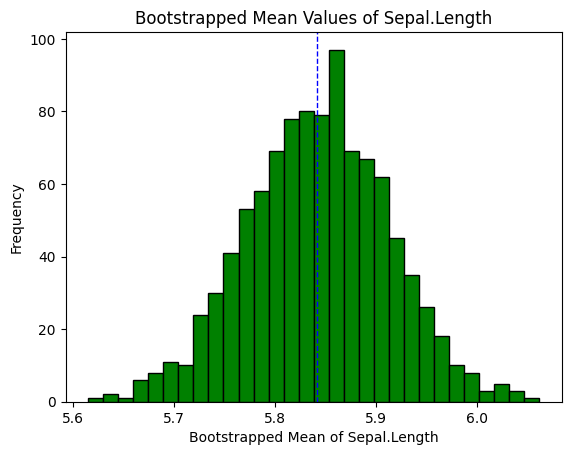

In [76]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_se_samples, bins=30, color='g', edgecolor='black')
ax.axvline(boot_mean, color='b', linestyle='dashed', linewidth=1, label='Bootstrapped Mean')

# Add a title
ax.set_title('Bootstrapped Mean Values of Sepal.Length')

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Mean of Sepal.Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# In summary, the shipping company should anticipate an average Sepal.Length of around 5.84 units
# and should ensure sufficient flexibility to accommodate lengths up to roughly 5.99 units.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
